# import module

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from prediction_tool import cross_validation_process, get_coefficient, predict

# input data

In [86]:
df_1 = pd.read_excel (r'迴歸資料.xlsx', sheet_name='2020')
df_2 = pd.read_excel (r'迴歸資料.xlsx', sheet_name='2021')
df_3 = df_1.append(df_2).reset_index().drop("index",axis=1)
df_3.rename(columns={"Unnamed: 0": "movie"}, inplace=True)
df_3.set_index('movie', inplace=True)

df_3["box_office_million"] = df_3["box_office"] / 1000000
df_4 = df_3.drop(['box_office'], axis=1)

X = df_4.iloc[:, df_4.columns != 'box_office_million']
Y = df_4.loc[:, df_4.columns == 'box_office_million']
model_x = X.iloc[:25]
model_y = Y.iloc[:25]

predict_x = X.iloc[25:]
predict_y = Y.iloc[25:]

# model selection

In [87]:
model = LinearRegression(fit_intercept=True)
method = 'neg_mean_squared_error'
cv_results = cross_validation_process(model, model_x, model_y, method=method, rangeK=25)
k = cv_results[0]
scroeList = cv_results[1]
estimatorList = cv_results[2]

### find best k to perform ross validation process

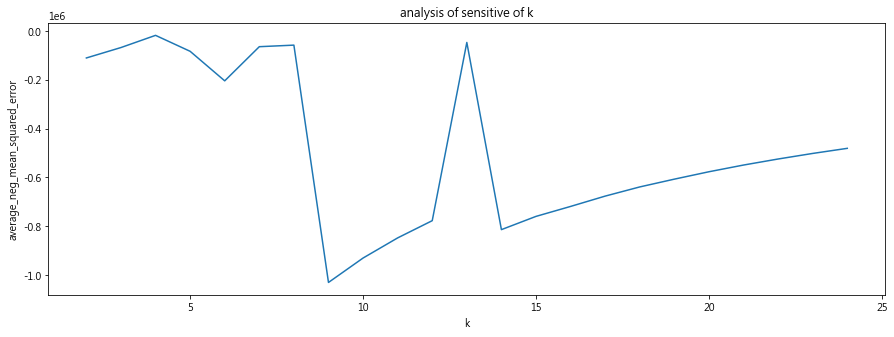

In [88]:
meanScore_by_k = []
round_of_k = len(scroeList)
for i in range(round_of_k):
    meanScore_by_k.append(np.mean(scroeList[i]))
plt.figure(figsize=(15,5))
plt.plot([i for i in range(2, round_of_k+2)], meanScore_by_k)
plt.rcParams['axes.unicode_minus']=False
plt.title('analysis of sensitive of k')
plt.ylabel('average_neg_mean_squared_error')
plt.xlabel('k')
plt.show()

### model test

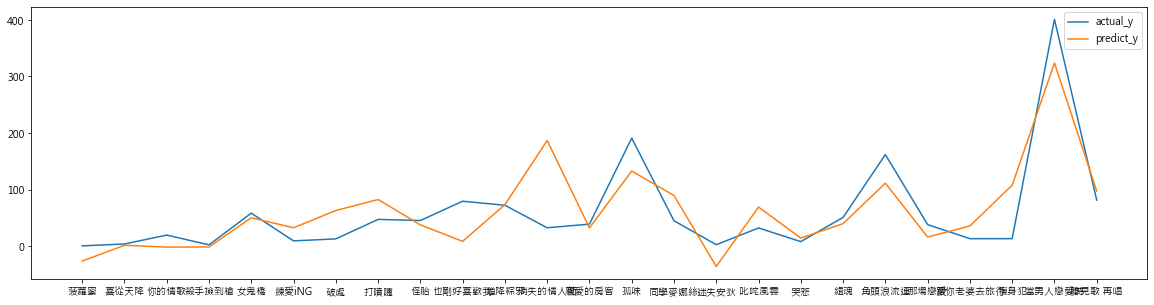

In [89]:
coefficients = get_coefficient(bestK=k, scores=scroeList, estimators=estimatorList)
case_num = len(model_x)
estimator_num = len(model_x.iloc[0])
y_bars = []
for i in range(case_num):
    case = model_x.iloc[i]
    y_bar = coefficients[-1]
    for j in range(estimator_num):
        y_bar += (case.iloc[j]*coefficients[j])
    y_bars.append(y_bar)

mse_raw = mean_squared_error(y_bars, model_y.values)

plt.figure(figsize=(20,5))
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size']=10
plt.plot(model_y.index, model_y, label='actual_y')
plt.plot(model_y.index, y_bars, label='predict_y')
plt.legend()
plt.show()

### error term

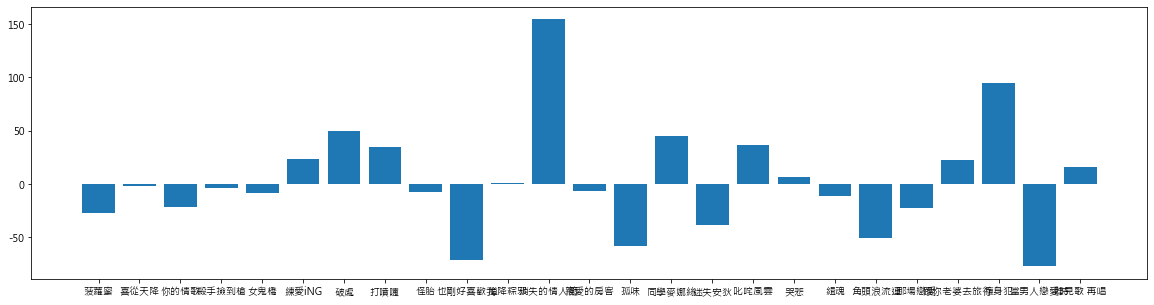

In [90]:
# raw model
error = []
for i in range(len(y_bars)):
    error.append(y_bars[i]-model_y.iloc[i].values[0])
plt.figure(figsize=(20,5))
plt.bar(model_y.index, error)
plt.show()

# add more x variable  --square

In [79]:
X_square = X.copy()
for column in X_square:
    X_square[f'{column}_square'] = X_square[column]**2

model_x_square = X_square.iloc[:25]
predict_x_square = X_square.iloc[25:]

model = LinearRegression(fit_intercept=True)
method = 'neg_mean_squared_error'
cv_results = cross_validation_process(model, model_x_square, model_y, method=method, rangeK=25)
k_square = cv_results[0]
scroeList_square = cv_results[1]
estimatorList_square = cv_results[2]

### find best k to perform cross validation process

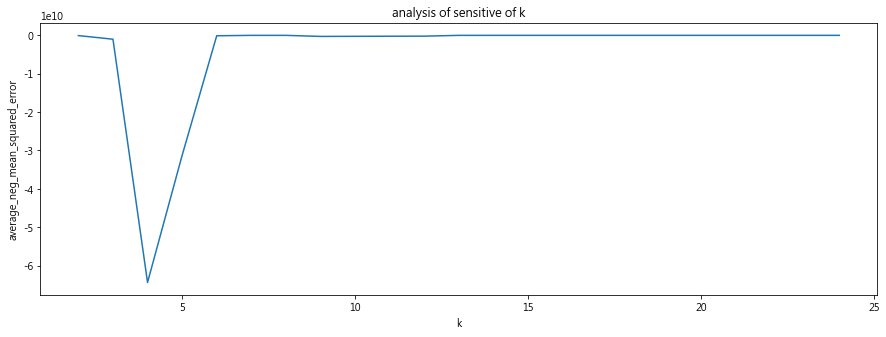

In [68]:
meanScore_by_k = []
round_of_k = len(scroeList_square)
for i in range(round_of_k):
    meanScore_by_k.append(np.mean(scroeList_square[i]))
plt.figure(figsize=(15,5))
plt.plot([i for i in range(2, round_of_k+2)], meanScore_by_k)
plt.title('analysis of sensitive of k')
plt.ylabel('average_neg_mean_squared_error')
plt.xlabel('k')
plt.show()

### test model

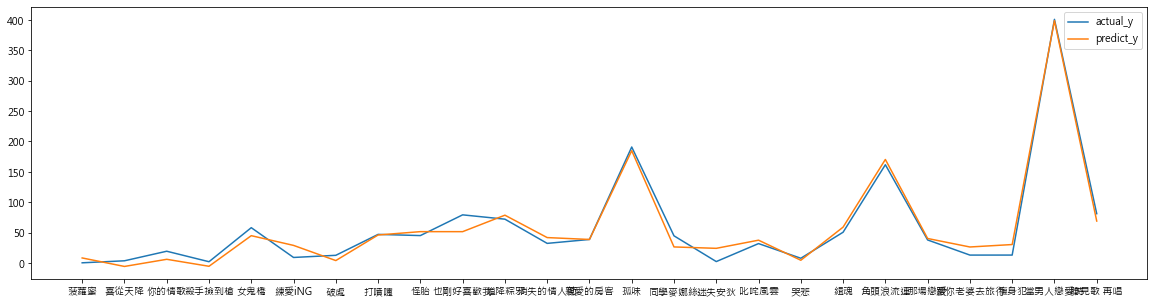

In [69]:
coefficients = get_coefficient(bestK=k_square, scores=scroeList_square, estimators=estimatorList_square)
case_num = len(model_x_square)
estimator_num = len(model_x_square.iloc[0])
y_bars = []
for i in range(case_num):
    case = model_x_square.iloc[i]
    y_bar = coefficients[-1]
    for j in range(estimator_num):
        y_bar += (case.iloc[j]*coefficients[j])
    y_bars.append(y_bar)

plt.figure(figsize=(20,5))
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.plot(model_y.index, model_y, label='actual_y')
plt.plot(model_y.index, y_bars, label='predict_y')
plt.legend()
plt.show()

mse_square = mean_squared_error(y_bars, model_y.values)

### error term

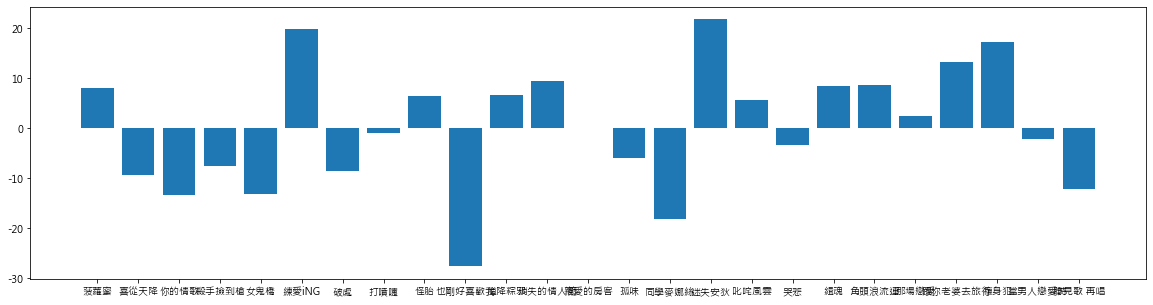

In [70]:
# raw model
error = []
for i in range(len(y_bars)):
    error.append(y_bars[i]-model_y.iloc[i].values[0])
plt.figure(figsize=(20,5))
plt.bar(model_y.index, error)
plt.show()

# add more variable --triple

In [71]:
X_triple = X.copy()
for column in X_triple:
    X_triple[f'{column}_triple'] = X_triple[column]**3

model_x_triple = X_triple.iloc[:25]
predict_x_triple = X_triple.iloc[25:]

model = LinearRegression(fit_intercept=True)
method = 'neg_mean_squared_error'
cv_results = cross_validation_process(model, model_x_triple, model_y, method=method, rangeK=25)
k_triple = cv_results[0]
scroeList_triple = cv_results[1]
estimatorList_triple = cv_results[2]

### find best k to perform cross validation process

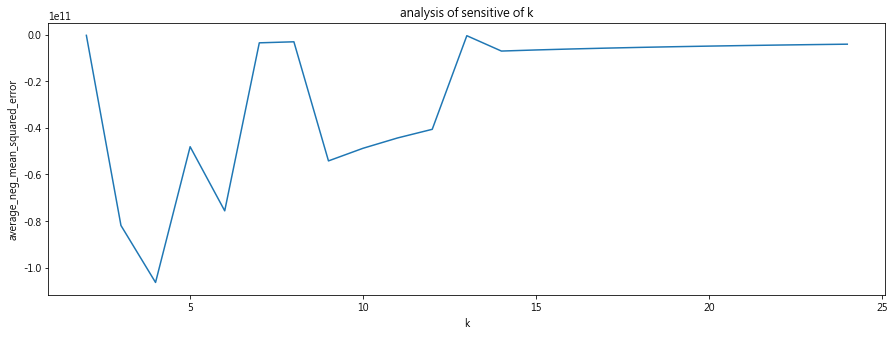

In [72]:
meanScore_by_k = []
round_of_k = len(scroeList_triple)
for i in range(round_of_k):
    meanScore_by_k.append(np.mean(scroeList_triple[i]))
plt.figure(figsize=(15,5))
plt.plot([i for i in range(2, round_of_k+2)], meanScore_by_k)
plt.title('analysis of sensitive of k')
plt.ylabel('average_neg_mean_squared_error')
plt.xlabel('k')
plt.show()

### test model

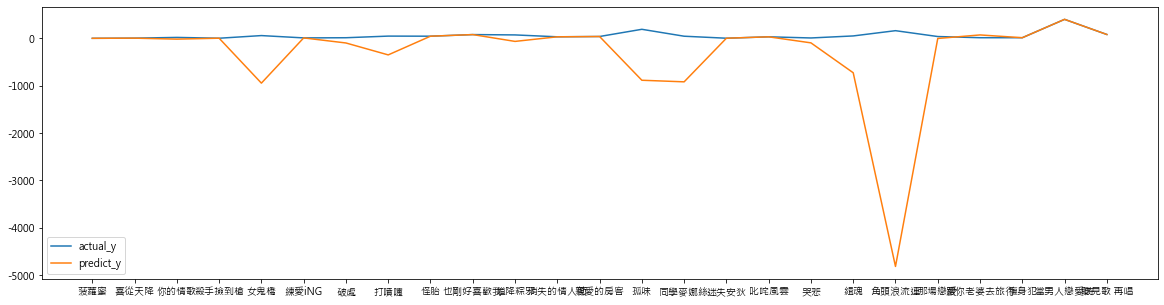

In [73]:
coefficients = get_coefficient(k_triple, scroeList_triple, estimatorList_triple)
case_num = len(model_x_triple)
estimator_num = len(model_x_triple.iloc[0])
y_bars = []
for i in range(case_num):
    case = model_x_triple.iloc[i]
    y_bar = coefficients[-1]
    for j in range(estimator_num):
        y_bar += (case.iloc[j]*coefficients[j])
    y_bars.append(y_bar)

plt.figure(figsize=(20,5))
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.plot(model_y.index, model_y, label='actual_y')
plt.plot(model_y.index, y_bars, label='predict_y')
plt.legend()
plt.show()

mse_triple = mean_squared_error(y_bars, model_y.values)

### error term

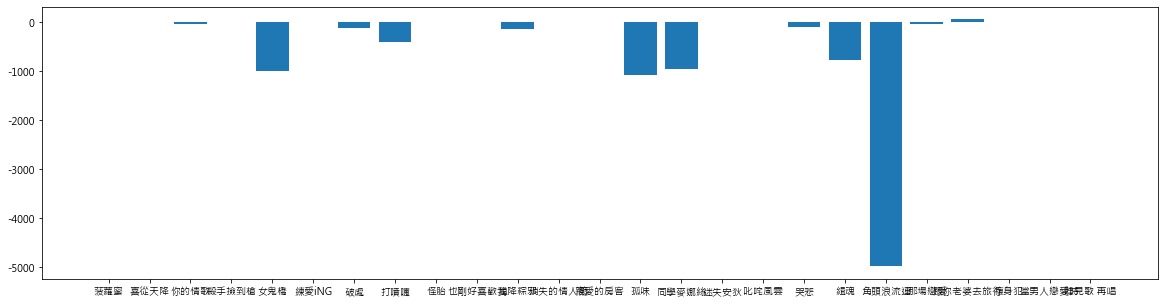

In [74]:
# raw model
error = []
for i in range(len(y_bars)):
    error.append(y_bars[i]-model_y.iloc[i].values[0])
plt.figure(figsize=(20,5))
plt.bar(model_y.index, error)
plt.show()

# add more variable --square and triple

In [75]:
X_square_triple = X.copy()
for column in X_square_triple:
    X_square_triple[f'{column}_square'] = X_square_triple[column]**2
    X_square_triple[f'{column}_triple'] = X_square_triple[column]**3

model_x_square_triple = X_square_triple.iloc[:25]
predict_x_square_triple = X_square_triple.iloc[25:]

model = LinearRegression(fit_intercept=True)
method = 'neg_mean_squared_error'
cv_results = cross_validation_process(model, model_x_square_triple, model_y, method=method, rangeK=25)
k_square_triple = cv_results[0]
scroeList_square_triple = cv_results[1]
estimatorList_square_triple = cv_results[2]

### find best k to perform cross validation

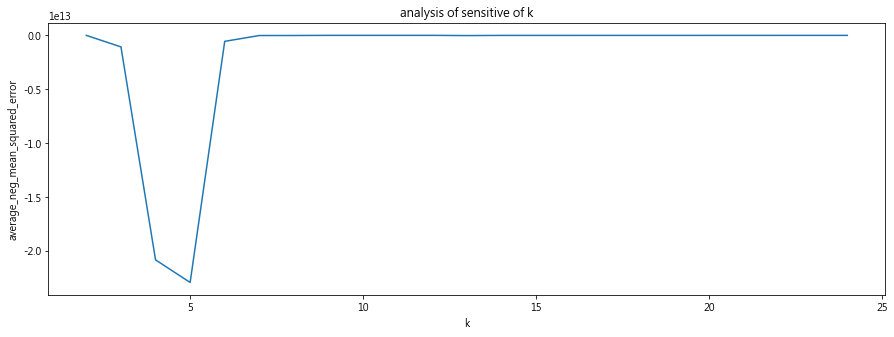

In [76]:
meanScore_by_k = []
round_of_k = len(scroeList_square_triple)
for i in range(round_of_k):
    meanScore_by_k.append(np.mean(scroeList_square_triple[i]))
plt.figure(figsize=(15,5))
plt.plot([i for i in range(2, round_of_k+2)], meanScore_by_k)
plt.title('analysis of sensitive of k')
plt.ylabel('average_neg_mean_squared_error')
plt.xlabel('k')
plt.show()

### test model

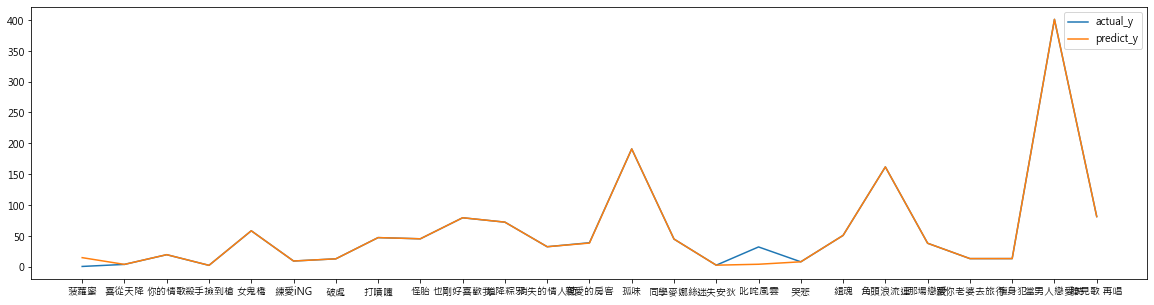

In [80]:
coefficients = get_coefficient(bestK=k_square_triple, scores=scroeList_square_triple, estimators=estimatorList_square_triple)
case_num = len(model_x_square_triple)
estimator_num = len(model_x_square_triple.iloc[0])
y_bars = []
for i in range(case_num):
    case = model_x_square_triple.iloc[i]
    y_bar = coefficients[-1]
    for j in range(estimator_num):
        y_bar += (case.iloc[j]*coefficients[j])
    y_bars.append(y_bar)

plt.figure(figsize=(20,5))
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.plot(model_y.index, model_y, label='actual_y')
plt.plot(model_y.index, y_bars, label='predict_y')
plt.legend()
plt.show()

mse_square_triple = mean_squared_error(y_bars, model_y.values)

### error term

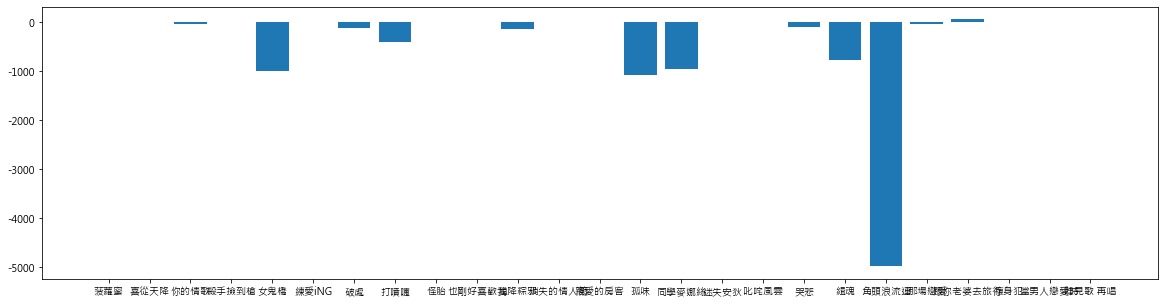

In [77]:
# raw model
error = []
for i in range(len(y_bars)):
    error.append(y_bars[i]-model_y.iloc[i].values[0])
plt.figure(figsize=(20,5))
plt.bar(model_y.index, error)
plt.show()

## MSE

In [84]:
pd.Series({'raw': mse_raw, 'square': mse_square, 'triple': mse_triple, 'square_triple': mse_square_triple}, name='mse').to_frame()

,mse
raw,2.466006e+03
square,1.454341e+02
triple,1.149068e+06
square_triple,3.970162e+01


### compare actual y and predict y using square model

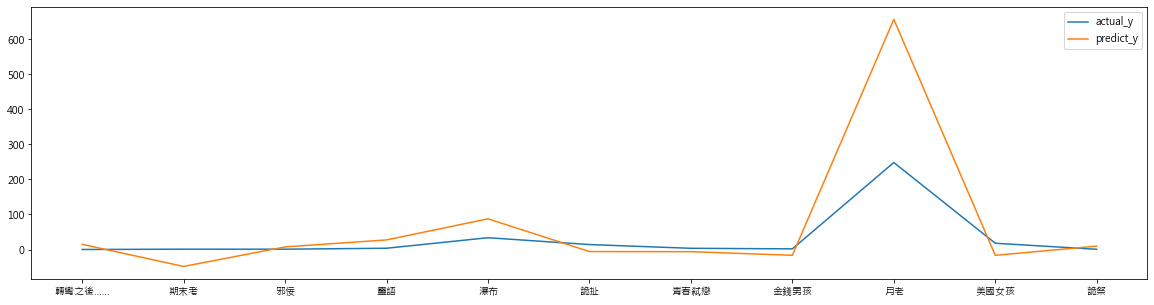

In [81]:
coefficients = get_coefficient(k_square, scroeList_square, estimatorList_square)
case_num = len(predict_x_square)
estimator_num = len(predict_x_square.iloc[0])
y_bars = []
for i in range(case_num):
    case = predict_x_square.iloc[i]
    y_bar = coefficients[-1]
    for j in range(estimator_num):
        y_bar += (case.iloc[j]*coefficients[j])
    y_bars.append(y_bar)

plt.figure(figsize=(20,5))
#plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.plot(Y.index[25:], predict_y, label='actual_y')
plt.plot(Y.index[25:], y_bars, label='predict_y')
plt.legend()
plt.show()

### error term outside model

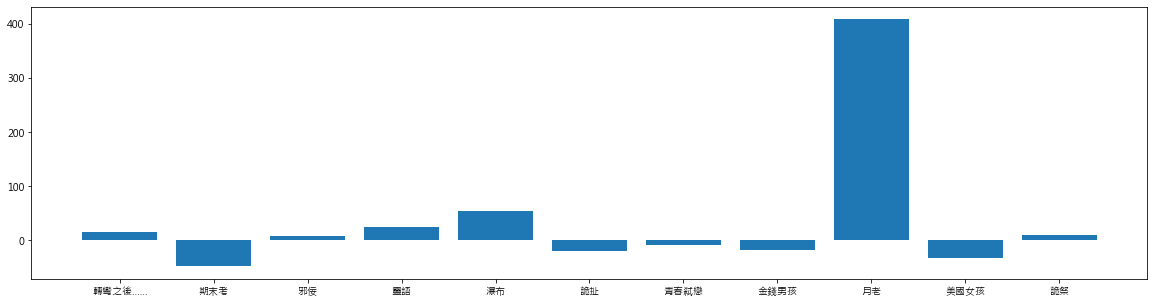

In [82]:
# raw model
error = []
for i in range(len(y_bars)):
    error.append(y_bars[i]-predict_y.iloc[i].values[0])
plt.figure(figsize=(20,5))
plt.bar(predict_y.index, error)
plt.show()